# Importing the Libraries

In [ ]:
#Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import warnings
warnings.filterwarnings("ignore")

# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline


# Loading the Dataset

In [ ]:
# Uploading saved dataframe csv file from google drive
! gdown --id 1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX
To: /content/df_1.csv
100% 788M/788M [00:08<00:00, 96.2MB/s]


In [ ]:
%%time
# Load Data
df   = pd.read_csv('/content/df_1.csv')

CPU times: user 17 s, sys: 5.12 s, total: 22.1 s
Wall time: 22.1 s


In [ ]:
df.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_missing_flag,V

In [ ]:
df.shape

(590540, 534)

# Model Building



In [ ]:
df.loc[:, 'isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

## Train-Test Split

Split the dataset into train set and test set. Train set will be used to train the model. Test set will be used to check the performance of model

In [ ]:
# Split the y variable series and X variables dataset
X = df.drop(['isFraud'],axis=1)
y = df.isFraud.astype(bool)

In [ ]:
# Split the dataset into the training set and test set
from   sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(413378, 533) (413378,)
(177162, 533) (177162,)


In [ ]:
# Head of X_train
X_train.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,V135_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_miss

## Handling Missing Values - Imputation

In [ ]:
from sklearn.impute import SimpleImputer

# replace inf
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Impute
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,V135_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_miss

## 1. Random Forest Classifier

### Model Fitting

In [ ]:
%%time
# Define the model
from   sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Train the model
rfc.fit(X_train_imputed, y_train)

rfc

CPU times: user 4min 47s, sys: 271 ms, total: 4min 47s
Wall time: 4min 46s


RandomForestClassifier(random_state=42)

In [ ]:
# Impute X_Test before predicting
X_test_imputed = imputer.transform(X_test)

# Prediction
y_pred_rfc = rfc.predict(X_test_imputed)
y_prob_pred_rfc = rfc.predict_proba(X_test_imputed)[:, 1]

print("Y predicted : ",y_pred_rfc)
print("Y probability predicted : ",y_prob_pred_rfc[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted :  [0.02 0.   0.   0.08 0.  ]


### Model Evaluation

Let's compute various evaluation metrices now
- Accuracy Score
- Confusion Matrix
- AUC - ROC Score
- Classification Report
- Confusion Matrix Plot
- AUC - ROC curve
- Precision - Recall curve 

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics  import classification_report 
from sklearn.metrics  import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics  import roc_auc_score 
from sklearn.metrics  import plot_roc_curve 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics  import plot_precision_recall_curve

In [ ]:
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):

    print('\n')
    print("\n Accuracy Score : ",accuracy_score(y_actual,y_predicted))
    print('\n')
    print("\n AUC - ROC Score : ", roc_auc_score(y_actual, y_predicted_prob))
    print('\n')
    print("\n Classification Report : \n\n",classification_report(y_actual, y_predicted))
    print('\n')
    print("\n Confusion Matrix : \n\n",confusion_matrix(y_actual, y_predicted))
    print('\n')
    print('\n Confusion Matrix Plot: \n')
    plot_confusion_matrix(model, x_test, y_actual, cmap='plasma', values_format='d')
    plt.show()

    print("\n AUC - ROC Curve:  \n")
   
    plot_roc_curve(model, x_test, y_actual)
    plt.show() 

    print("\n Precision - Recall Curve:  \n")
    plot_precision_recall_curve(model, x_test, y_actual)
    plt.show() 




 Accuracy Score :  0.9789176008399092



 AUC - ROC Score :  0.9302540605403999



 Classification Report : 

               precision    recall  f1-score   support

       False       0.98      1.00      0.99    170821
        True       0.95      0.43      0.60      6341

    accuracy                           0.98    177162
   macro avg       0.96      0.72      0.79    177162
weighted avg       0.98      0.98      0.98    177162




 Confusion Matrix : 

 [[170670    151]
 [  3584   2757]]



 Confusion Matrix Plot: 



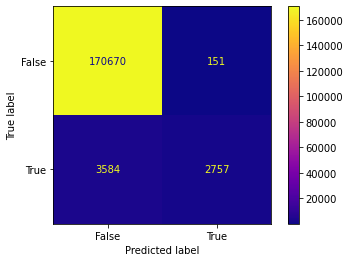


 AUC - ROC Curve:  



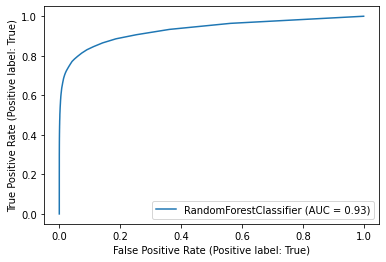


 Precision - Recall Curve:  



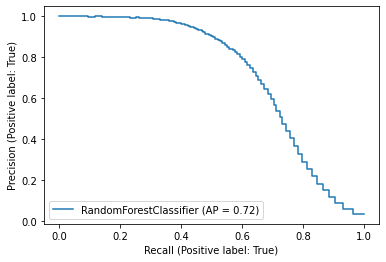

In [ ]:
# Compute Evaluation Metric
compute_evaluation_metric(rfc, X_test_imputed, y_test, y_pred_rfc, y_prob_pred_rfc)

### Feature Selection

In [ ]:
rfc.feature_importances_

array([1.50073328e-02, 2.00264875e-03, 1.78513267e-02, 1.53128546e-02,
       4.34675855e-03, 4.27597462e-03, 8.79238980e-03, 5.23841897e-03,
       1.33162241e-02, 1.69180742e-03, 6.37508585e-03, 9.46844311e-03,
       5.08220573e-03, 2.48483673e-02, 1.33736008e-02, 4.56043705e-05,
       1.16012647e-02, 2.10437862e-03, 1.01996372e-02, 7.97576119e-03,
       9.14047950e-03, 4.03851019e-03, 6.44742112e-03, 1.27818446e-02,
       9.81153933e-03, 1.74730473e-02, 1.39807207e-02, 8.57453575e-03,
       9.24427275e-03, 6.68274109e-03, 6.22897729e-03, 4.95039607e-03,
       2.14521325e-03, 6.58879127e-03, 2.70682338e-03, 5.89172609e-03,
       4.21657891e-03, 2.15739181e-03, 1.33946670e-03, 1.87384634e-03,
       7.74786518e-03, 2.83772567e-04, 1.44586968e-03, 1.76374598e-03,
       3.65932814e-03, 2.71613573e-03, 2.84834922e-03, 1.60760320e-03,
       1.99843168e-03, 2.05872432e-03, 4.16062034e-03, 7.12754755e-03,
       1.84984181e-03, 8.19425453e-04, 3.44602867e-03, 3.20926820e-03,
      

In [ ]:
rfc_feature_importance_df = pd.DataFrame({'feature' : X_train_imputed.columns, 'importance' : rfc.feature_importances_ })

In [ ]:
rfc_feature_importance_df = rfc_feature_importance_df.head(15).sort_values(by="importance", ascending=False)
rfc_feature_importance_df = rfc_feature_importance_df.iloc[:30,:]
rfc_feature_importance_df

,feature,importance
13,C1,0.024848
2,card1,0.017851
3,card2,0.015313
0,TransactionAmt,0.015007
14,C2,0.013374
8,addr1,0.013316
11,P_emaildomain,0.009468
6,card5,0.008792
10,dist1,0.006375
7,card6,0.005238


Text(0, 0.5, 'Features')

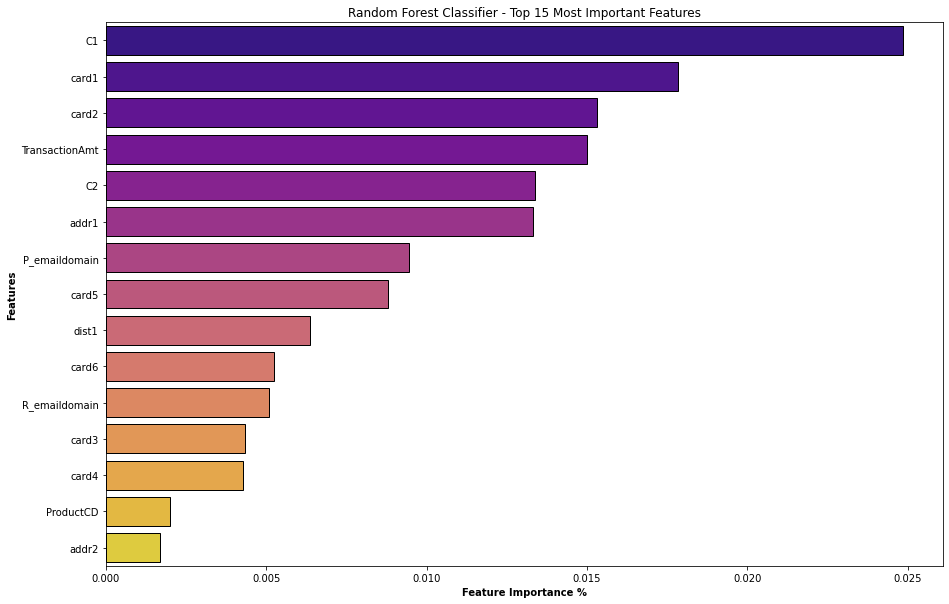

In [ ]:
plt.figure(figsize=(15, 10));
sns.barplot(x="importance", y="feature", data=rfc_feature_importance_df.head(15).sort_values(by="importance", ascending=False),
            palette= 'plasma',edgecolor = 'black',linewidth = 1);
plt.title('Random Forest Classifier - Top 15 Most Important Features')
plt.xlabel('Feature Importance %',weight='bold')
plt.ylabel('Features',weight='bold')

## 2. Logistic Regression

### Model Fitting


In [ ]:
%%time
# Define the model
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(random_state=42)

# Train the model
lreg.fit(X_train_imputed, y_train)

lreg

CPU times: user 1min 48s, sys: 22.5 s, total: 2min 11s
Wall time: 37 s


LogisticRegression(random_state=42)

In [ ]:
# Impute X_Test before predicting
X_test_imputed = imputer.transform(X_test)

# Prediction
y_pred_lreg = lreg.predict(X_test_imputed)
y_prob_pred_lreg = lreg.predict_proba(X_test_imputed)[:, 1]

print("Y predicted : ",y_pred_lreg)
print("Y probability predicted : ",y_prob_pred_lreg[:5])


Y predicted :  [False False False ... False False False]
Y probability predicted :  [0.03170949 0.01625096 0.02652607 0.05095767 0.00474956]


### Model Evaluation




 Accuracy Score :  0.963722468700963



 AUC - ROC Score :  0.7191867868640781



 Classification Report : 

               precision    recall  f1-score   support

       False       0.96      1.00      0.98    170821
        True       0.08      0.00      0.00      6341

    accuracy                           0.96    177162
   macro avg       0.52      0.50      0.49    177162
weighted avg       0.93      0.96      0.95    177162




 Confusion Matrix : 

 [[170727     94]
 [  6333      8]]



 Confusion Matrix Plot: 



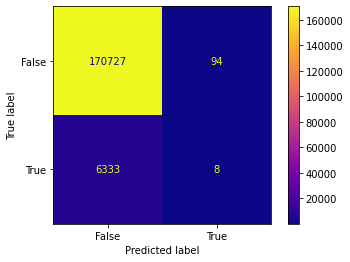


 AUC - ROC Curve:  



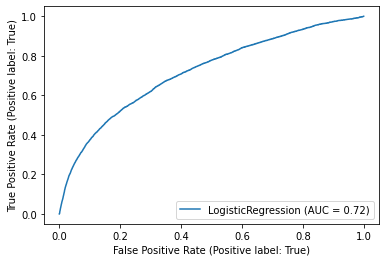


 Precision - Recall Curve:  



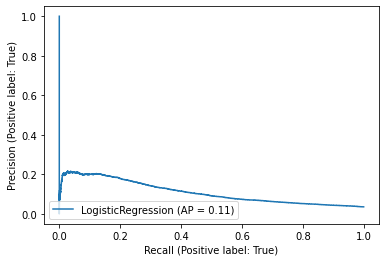

In [ ]:
# Compute Evaluation Metric
compute_evaluation_metric(lreg, X_test_imputed, y_test, y_pred_lreg, y_prob_pred_lreg)

## 3. Decision Tree Classifier 

### Model Fitting

In [ ]:
%%time
# Define the model
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(random_state=42)

# Train the model
dtc.fit(X_train_imputed, y_train)

dtc

CPU times: user 2min 27s, sys: 142 ms, total: 2min 27s
Wall time: 2min 26s


DecisionTreeClassifier(random_state=42)

In [ ]:
# Impute X_Test before predicting
X_test_imputed = imputer.transform(X_test)

# Prediction
y_pred_dtc = dtc.predict(X_test_imputed)
y_prob_pred_dtc = dtc.predict_proba(X_test_imputed)[:, 1]

print("Y predicted : ",y_pred_dtc)
print("Y probability predicted : ",y_prob_pred_dtc[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted :  [0. 0. 0. 0. 0.]


### Model Evaluation




 Accuracy Score :  0.9639764735101207



 AUC - ROC Score :  0.7700966232946153



 Classification Report : 

               precision    recall  f1-score   support

       False       0.98      0.98      0.98    170821
        True       0.50      0.56      0.53      6341

    accuracy                           0.96    177162
   macro avg       0.74      0.77      0.75    177162
weighted avg       0.97      0.96      0.97    177162




 Confusion Matrix : 

 [[167221   3600]
 [  2782   3559]]



 Confusion Matrix Plot: 



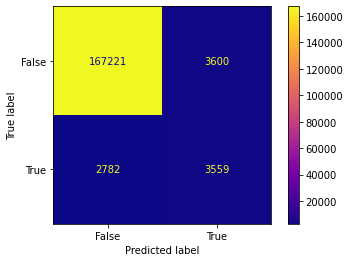


 AUC - ROC Curve:  



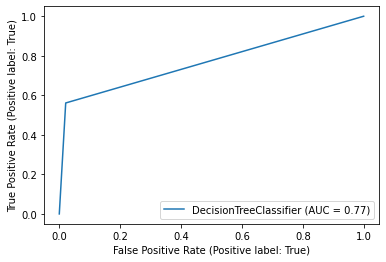


 Precision - Recall Curve:  



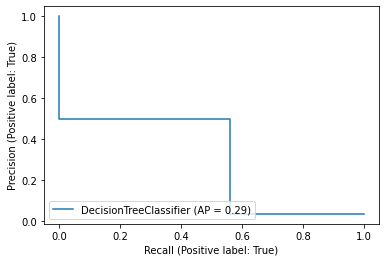

In [ ]:
# Compute Evaluation Metric
compute_evaluation_metric(dtc, X_test_imputed, y_test, y_pred_dtc, y_prob_pred_dtc)

### Feature Selection

In [ ]:
dtc.feature_importances_

array([7.41377197e-03, 9.82674453e-04, 2.72673365e-02, 1.95499144e-02,
       1.95461538e-03, 4.53889761e-03, 7.88853194e-03, 4.29990574e-03,
       2.01879110e-02, 6.30093845e-04, 1.04376547e-02, 1.12856289e-02,
       5.54088294e-03, 8.07556363e-02, 1.04406722e-02, 3.61642822e-05,
       7.26714882e-03, 2.07043388e-03, 6.86102446e-03, 6.05357364e-02,
       2.79600019e-03, 4.43026079e-03, 3.06327334e-03, 4.66547014e-03,
       6.20367051e-03, 3.15998427e-02, 3.17750420e-02, 9.72227106e-03,
       6.73221809e-03, 8.87819390e-03, 7.13817625e-03, 2.93596509e-03,
       2.99677456e-03, 8.01306651e-03, 3.13747994e-03, 5.46545536e-03,
       5.51743587e-03, 9.81453580e-04, 2.62562927e-03, 2.05652951e-03,
       7.92511803e-03, 0.00000000e+00, 8.60020138e-04, 8.01752732e-04,
       3.23916448e-03, 3.75360587e-03, 2.28205367e-03, 1.08422015e-03,
       1.60602418e-03, 1.51060678e-03, 4.94991875e-03, 8.16533106e-03,
       1.95958019e-03, 6.92092674e-04, 4.66229646e-03, 3.50696725e-03,
      

In [ ]:
dtc_feature_importance_df = pd.DataFrame({'feature' : X_train_imputed.columns, 'importance' : dtc.feature_importances_ })

In [ ]:
dtc_feature_importance_df = dtc_feature_importance_df.head(15).sort_values(by="importance", ascending=False)
dtc_feature_importance_df = dtc_feature_importance_df.iloc[:30,:]
dtc_feature_importance_df

,feature,importance
13,C1,0.080756
2,card1,0.027267
8,addr1,0.020188
3,card2,0.019550
11,P_emaildomain,0.011286
14,C2,0.010441
10,dist1,0.010438
6,card5,0.007889
0,TransactionAmt,0.007414
12,R_emaildomain,0.005541


Text(0, 0.5, 'Features')

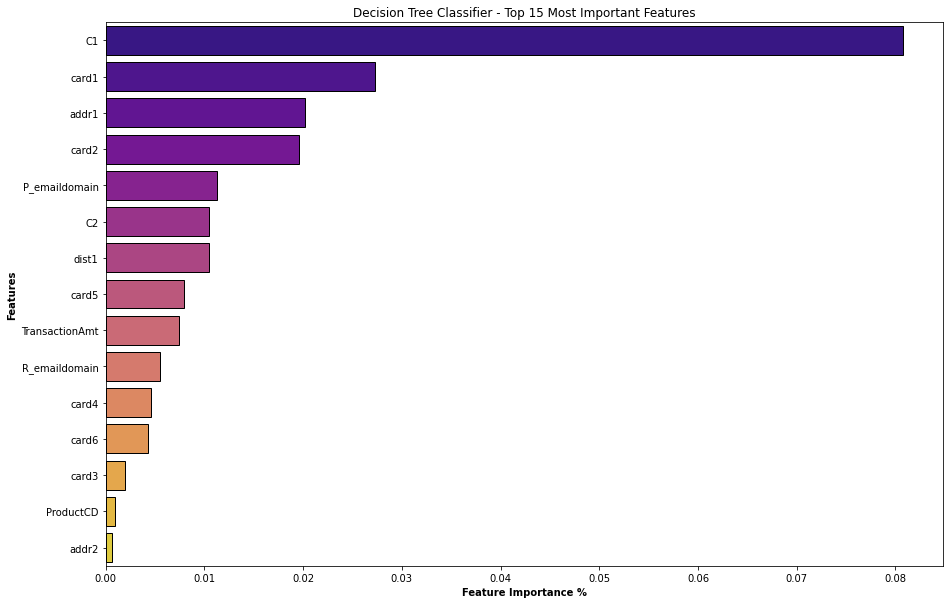

In [ ]:
plt.figure(figsize=(15, 10));
sns.barplot(x="importance", y="feature", data=dtc_feature_importance_df.head(15).sort_values(by="importance", ascending=False),
            palette= 'plasma',edgecolor = 'black',linewidth = 1);
plt.title('Decision Tree Classifier - Top 15 Most Important Features')
plt.xlabel('Feature Importance %',weight='bold')
plt.ylabel('Features',weight='bold')

## 4. XGBOOST Classifier 

### Model Fitting

In [ ]:
%%time
# Define the model
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)

# Train the model
xgb.fit(X_train, y_train)

xgb

CPU times: user 7min 49s, sys: 2.81 s, total: 7min 51s
Wall time: 7min 50s


XGBClassifier(random_state=42)

Let's use the model to get predictions on test dataset. We would be looking at the predicted class and predicted probability both in order to evaluate the performance of the model

In [ ]:
# Prediction
y_pred_xgb = xgb.predict(X_test)
y_prob_pred_xgb = xgb.predict_proba(X_test)
y_prob_pred_xgb = [x[1] for x in y_prob_pred_xgb]
print("Y predicted : ",y_pred_xgb)
print("Y probability predicted : ",y_prob_pred_xgb[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted :  [0.019187666, 0.011444872, 0.0052509303, 0.07062589, 0.004676597]


### Model Evaluation




 Accuracy Score :  0.9731262911911133



 AUC - ROC Score :  0.8882361261154317



 Classification Report : 

               precision    recall  f1-score   support

       False       0.97      1.00      0.99    170821
        True       0.88      0.29      0.43      6341

    accuracy                           0.97    177162
   macro avg       0.93      0.64      0.71    177162
weighted avg       0.97      0.97      0.97    177162




 Confusion Matrix : 

 [[170583    238]
 [  4523   1818]]



 Confusion Matrix Plot: 



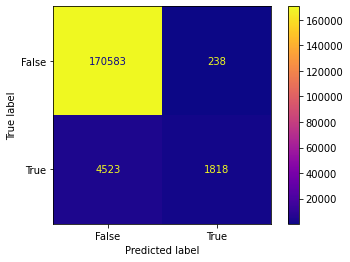


 AUC - ROC Curve:  



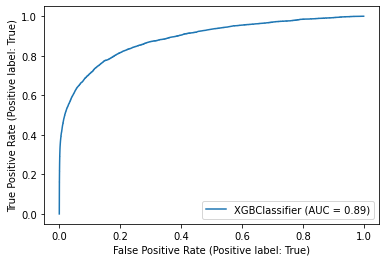


 Precision - Recall Curve:  



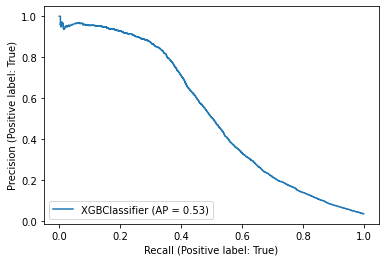

In [ ]:
# Compute Evaluation Metric
compute_evaluation_metric(xgb, X_test, y_test, y_pred_xgb, y_prob_pred_xgb)

### Feature Selection

In [ ]:
xgb.feature_importances_

array([0.01149402, 0.00239902, 0.00544858, 0.00918565, 0.00654746,
       0.00097313, 0.00566399, 0.01911569, 0.00490483, 0.00165183,
       0.00476089, 0.00422487, 0.02416215, 0.03594337, 0.01357597,
       0.        , 0.05156819, 0.02859362, 0.0088896 , 0.11171226,
       0.03569296, 0.00595263, 0.        , 0.02364208, 0.01803189,
       0.01804077, 0.01964702, 0.005173  , 0.01157112, 0.01757614,
       0.00236789, 0.01095788, 0.        , 0.02021417, 0.        ,
       0.01277701, 0.00551068, 0.00278941, 0.00354628, 0.00195526,
       0.01133684, 0.        , 0.        , 0.00480871, 0.01922326,
       0.00824427, 0.00426563, 0.        , 0.        , 0.        ,
       0.00742699, 0.        , 0.01022798, 0.        , 0.00554837,
       0.0037232 , 0.00427586, 0.        , 0.        , 0.01068829,
       0.00163983, 0.00309156, 0.        , 0.00455976, 0.02200655,
       0.00074586, 0.00364461, 0.        , 0.        , 0.00549934,
       0.        , 0.00941057, 0.        , 0.        , 0.     

In [ ]:
xgb_feature_importance_df = pd.DataFrame({'feature' : X_train_imputed.columns, 'importance' : xgb.feature_importances_ })

In [ ]:
xgb_feature_importance_df = xgb_feature_importance_df.head(15).sort_values(by="importance", ascending=False)
xgb_feature_importance_df = xgb_feature_importance_df.iloc[:30,:]
xgb_feature_importance_df

,feature,importance
13,C1,0.035943
12,R_emaildomain,0.024162
7,card6,0.019116
14,C2,0.013576
0,TransactionAmt,0.011494
3,card2,0.009186
4,card3,0.006547
6,card5,0.005664
2,card1,0.005449
8,addr1,0.004905


Text(0, 0.5, 'Features')

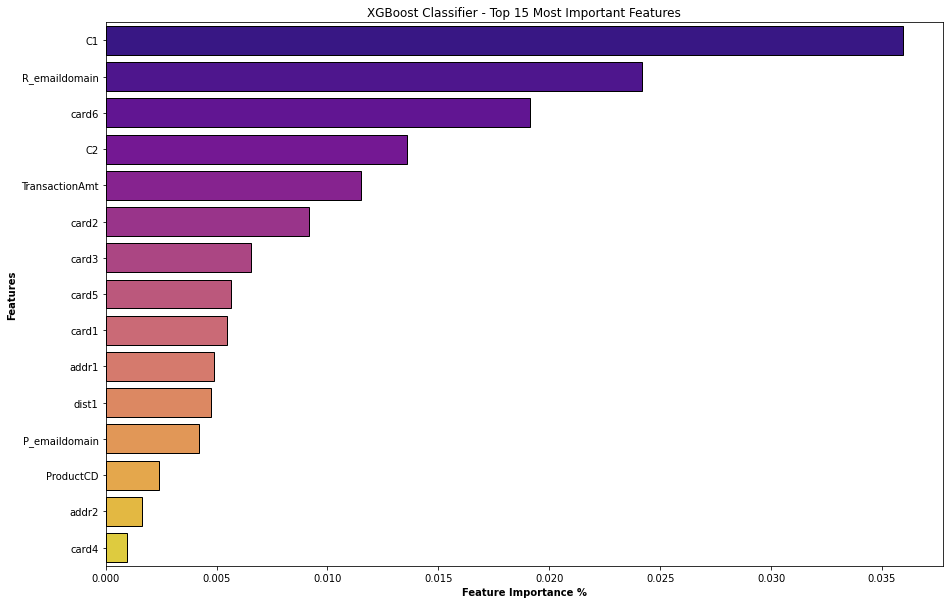

In [ ]:
plt.figure(figsize=(15, 10));
sns.barplot(x="importance", y="feature", data=xgb_feature_importance_df.head(15).sort_values(by="importance", ascending=False),
            palette= 'plasma',edgecolor = 'black',linewidth = 1);
plt.title('XGBoost Classifier - Top 15 Most Important Features')
plt.xlabel('Feature Importance %',weight='bold')
plt.ylabel('Features',weight='bold')

## 5. Light GBM Classifier

### Model Fitting

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
%%time
# Define the model
lgbc = LGBMClassifier(random_state=42)

# Train the model
lgbc.fit(X_train_imputed,y_train)

lgbc

CPU times: user 2min 35s, sys: 513 ms, total: 2min 36s
Wall time: 42.2 s


LGBMClassifier(random_state=42)

In [ ]:
# Impute X_Test before predicting
X_test_imputed = imputer.transform(X_test)

# Prediction
y_pred_lgbc = lgbc.predict(X_test_imputed)
y_prob_pred_lgbc = lgbc.predict_proba(X_test_imputed)
y_prob_pred_lgbc = [x[1] for x in y_prob_pred_lgbc]
print("Y predicted : ",y_pred_lgbc)
print("Y probability predicted : ",y_prob_pred_lgbc[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted :  [0.014669277789592556, 0.0050278682561489514, 0.004095356762823726, 0.06260418199848658, 0.003417118641447139]


### Model Evaluation




 Accuracy Score :  0.9770887662139737



 AUC - ROC Score :  0.9273589801352691



 Classification Report : 

               precision    recall  f1-score   support

       False       0.98      1.00      0.99    170821
        True       0.88      0.42      0.56      6341

    accuracy                           0.98    177162
   macro avg       0.93      0.71      0.78    177162
weighted avg       0.98      0.98      0.97    177162




 Confusion Matrix : 

 [[170471    350]
 [  3709   2632]]



 Confusion Matrix Plot: 



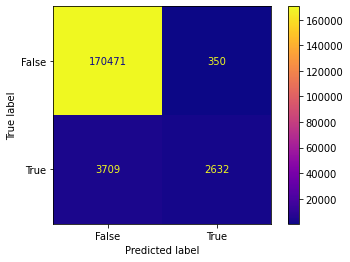


 AUC - ROC Curve:  



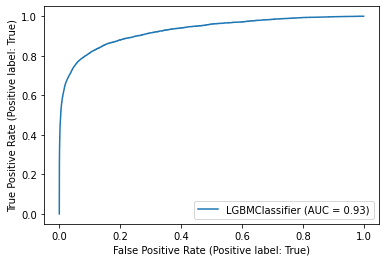


 Precision - Recall Curve:  



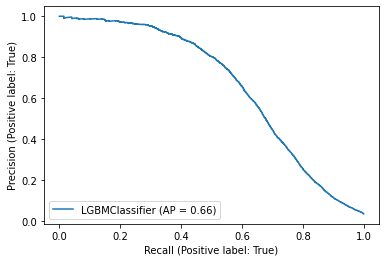

In [ ]:
# Compute Evaluation Metric
compute_evaluation_metric(lgbc, X_test_imputed, y_test, y_pred_lgbc, y_prob_pred_lgbc)

### Feature Selection

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [ ]:
lgbc.feature_importances_

array([ 62,  22, 111, 111,  41,  17,  51,  36,  87,   4,  33,  59,  42,
        67,  46,  13,   5,  29,  54,   5,  27,  31,   6,  36,  15,  76,
        65,  53,  61,  26,  43,   7,   5,  40,   3,  34,  31,   6,  12,
        11,  45,   0,   4,   9,  19,  31,  26,   3,   1,   5,  23,  29,
        11,   9,  16,   7,  11,   0,   1,   0,  19,  12,   4,   3,  11,
        17,  41,   0,   0,   8,   6,   6,  21,   3,   1,   1,   4,   9,
         7,  35,   9,   0,   0,   5,   0,   0,   0,   1,   1,   5,   0,
         0,   2,   3,   0,   0,   1,   0,   0,   0,   0,   0,   0,   2,
         0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
lgbc_feature_importance_df = pd.DataFrame({'feature' : X_train_imputed.columns, 'importance' : lgbc.feature_importances_ })

In [ ]:
lgbc_feature_importance_df = lgbc_feature_importance_df.head(15).sort_values(by="importance", ascending=False)
lgbc_feature_importance_df = lgbc_feature_importance_df.iloc[:30,:]
lgbc_feature_importance_df

,feature,importance
2,card1,111
3,card2,111
8,addr1,87
13,C1,67
0,TransactionAmt,62
11,P_emaildomain,59
6,card5,51
14,C2,46
12,R_emaildomain,42
4,card3,41


Text(0, 0.5, 'Features')

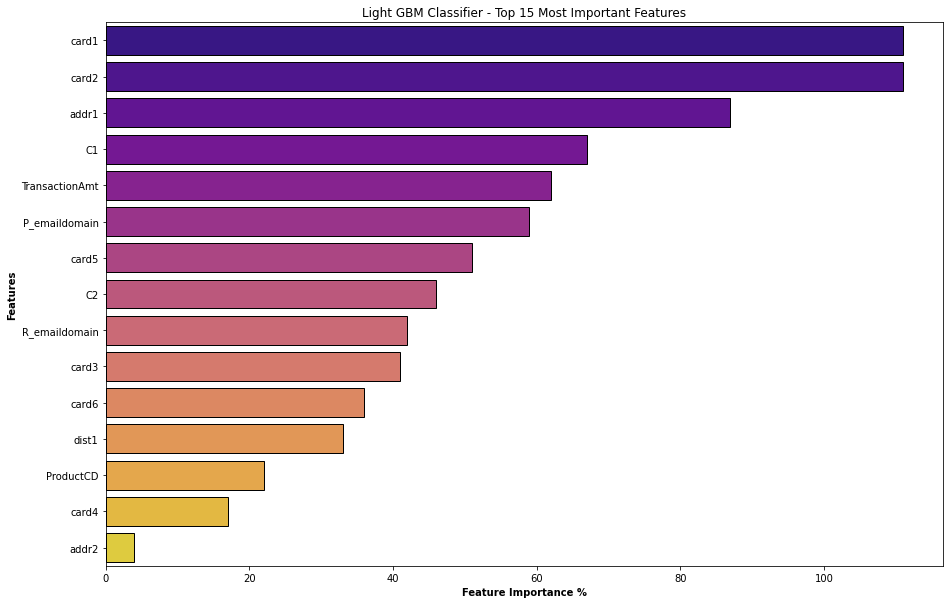

In [ ]:
plt.figure(figsize=(15, 10));
sns.barplot(x="importance", y="feature", data=lgbc_feature_importance_df.head(15).sort_values(by="importance", ascending=False),
            palette= 'plasma',edgecolor = 'black',linewidth = 1);
plt.title('Light GBM Classifier - Top 15 Most Important Features')
plt.xlabel('Feature Importance %',weight='bold')
plt.ylabel('Features',weight='bold')

# Model Hyperparamter Tuning

Below are Best Hyperparamters obtained when performed hyperparamter tuning on Light GBM Classifier.

1. learning_rate : 0.1
2. max_depth : 20
3. n_estimator : 100 
4. num_leaves : 256

In [ ]:
%%time
# Define the model
lgbc = LGBMClassifier(random_state=42, max_depth=20, n_estimator=100, num_leaves=256)

# Train the model
lgbc.fit(X_train_imputed,y_train)

lgbc

CPU times: user 4min 56s, sys: 711 ms, total: 4min 57s
Wall time: 1min 18s


LGBMClassifier(max_depth=20, n_estimator=100, num_leaves=256, random_state=42)

In [ ]:
# Prediction
y_pred_lgbc = lgbc.predict(X_test_imputed)
y_prob_pred_lgbc = lgbc.predict_proba(X_test_imputed)
y_prob_pred_lgbc = [x[1] for x in y_prob_pred_lgbc]
print("Y predicted : ",y_pred_lgbc)
print("Y probability predicted : ",y_prob_pred_lgbc[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted :  [0.004178265453865326, 0.003889994601454283, 0.003588747499682396, 0.05139667781750812, 0.0007428310332015758]





 Accuracy Score :  0.9827050947720166



 AUC - ROC Score :  0.9594066674454199



 Classification Report : 

               precision    recall  f1-score   support

       False       0.98      1.00      0.99    170821
        True       0.93      0.56      0.70      6341

    accuracy                           0.98    177162
   macro avg       0.96      0.78      0.84    177162
weighted avg       0.98      0.98      0.98    177162




 Confusion Matrix : 

 [[170562    259]
 [  2805   3536]]



 Confusion Matrix Plot: 



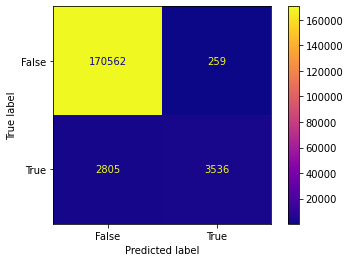


 AUC - ROC Curve:  



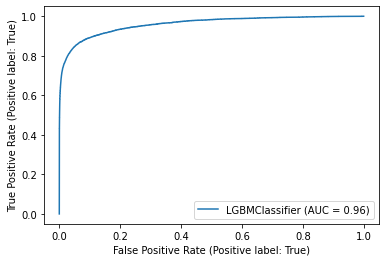


 Precision - Recall Curve:  



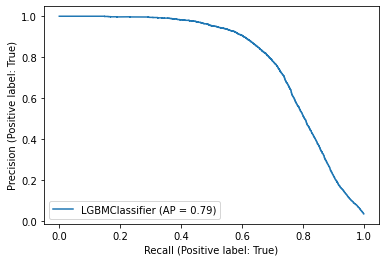

In [ ]:
# Compute Evaluation Metric
compute_evaluation_metric(lgbc, X_test_imputed, y_test, y_pred_lgbc, y_prob_pred_lgbc)

# Feature Selection

In [ ]:
lgbc.feature_importances_

array([ 367,   71, 1328,  978,  126,  114,  393,  144,  920,   19,  354,
        433,  174,  286,  284,   27,   26,  103,  238,   19,   98,  176,
         75,  233,   66,  421,  204,  349,  282,  173,  290,  119,   49,
        221,  101,  321,  185,   48,   56,   73,  385,    1,   47,   46,
        145,  127,  140,   42,   29,   41,  133,  345,   35,   20,  134,
        112,   42,   12,   23,    7,  151,   91,   21,   14,   44,  260,
        305,    9,    2,   39,   86,   10,  129,   17,    3,    6,   19,
         51,   27,  252,   34,    0,    0,   17,    0,    2,    0,   19,
         33,   12,    1,    1,   14,   15,    1,   12,    5,    3,    0,
          0,    0,    0,    0,    9,    5,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
lgbc_feature_importance_df = pd.DataFrame({'feature' : X_train_imputed.columns, 'importance' : lgbc.feature_importances_ })

In [ ]:
lgbc_feature_importance_df = lgbc_feature_importance_df.head(15).sort_values(by="importance", ascending=False)
lgbc_feature_importance_df = lgbc_feature_importance_df.iloc[:30,:]
lgbc_feature_importance_df

,feature,importance
2,card1,1328
3,card2,978
8,addr1,920
11,P_emaildomain,433
6,card5,393
0,TransactionAmt,367
10,dist1,354
13,C1,286
14,C2,284
12,R_emaildomain,174


Text(0, 0.5, 'Features')

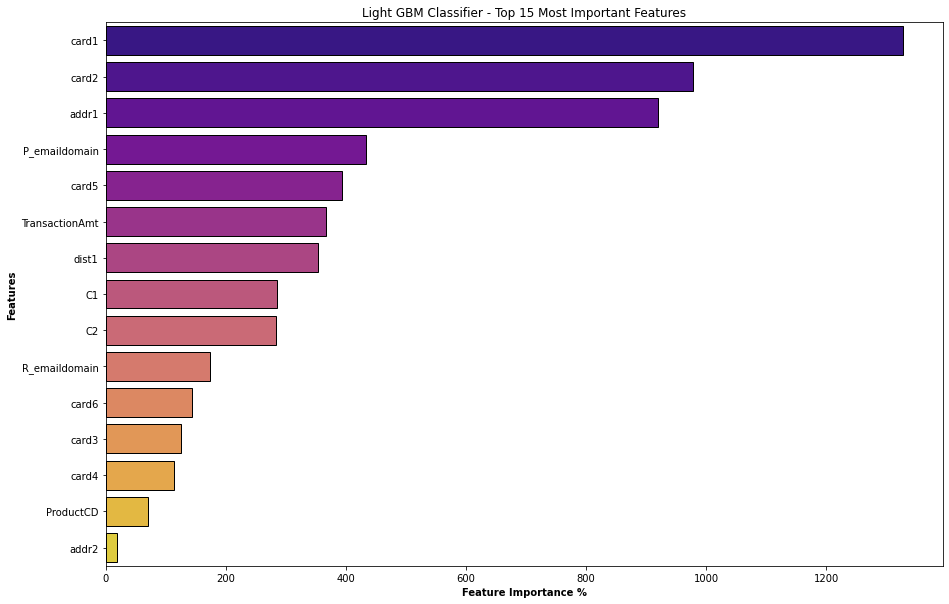

In [ ]:
plt.figure(figsize=(15, 10));
sns.barplot(x="importance", y="feature", data=lgbc_feature_importance_df.head(15).sort_values(by="importance", ascending=False),
            palette= 'plasma',edgecolor = 'black',linewidth = 1);
plt.title('Light GBM Classifier - Top 15 Most Important Features')
plt.xlabel('Feature Importance %',weight='bold')
plt.ylabel('Features',weight='bold')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

After fitting best parameters on Light GBM Classifier, below are Model Results on various evaluation metrics. to summarize, there is significant improvement in ML modeling results after applying hyperparameter tuning.

- Accuracy Score :  98.27
- AUC - ROC Score :  0.96
- F1 score : 70%

- card1 is contributing the most in predicting if a financial transaction is fraud or legitimate
- card2, addr1, P_emaildomain, etc are some of the most important features in predicting the fraud
- Certain card types, addresses and emails are at high risk of fraud, so there is a need to monitor these carefully